## Import all the files from UTD dataset 

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

In [2]:
import pandas as pd

# loading traffic, detector location, and links dataset
traffic = pd.read_csv(r'.\DataScienceData\UTD\utd19_u.csv')
detectors = pd.read_csv(r'.\DataScienceData\UTD\detectors_public.csv')
links = pd.read_csv(r'.\DataScienceData\UTD\links.csv')

C:\Users\Vishal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
traffic.head()

,day,interval,detid,flow,occ,error,city,speed
0,2017-05-06,0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
1,2017-05-06,300,06.X-2li,12.0,0.0,1.0,augsburg,NaN
2,2017-05-06,600,06.X-2li,12.0,0.0,1.0,augsburg,NaN
3,2017-05-06,900,06.X-2li,16.0,0.0,1.0,augsburg,NaN
4,2017-05-06,1200,06.X-2li,16.0,0.0,1.0,augsburg,NaN


### We are only interested in London dataset 

In [4]:
london_traffic = traffic[traffic['city'] == 'london']

Let's print the head and tail of london traffic data

In [5]:
london_traffic.head()

,day,interval,detid,flow,occ,error,city,speed
39938340,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
39938341,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
39938342,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
39938343,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
39938344,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [6]:
london_traffic.tail()

,day,interval,detid,flow,occ,error,city,speed
74335657,2016-05-22,84900,CNTR_N01/106b2,168.0,0.040000,0.0,london,NaN
74335658,2016-05-22,85200,CNTR_N01/106b2,156.0,0.047500,0.0,london,NaN
74335659,2016-05-22,85500,CNTR_N01/106b2,144.0,0.032500,0.0,london,NaN
74335660,2016-05-22,85800,CNTR_N01/106b2,132.0,0.032500,0.0,london,NaN
74335661,2016-05-22,86100,CNTR_N01/106b2,144.0,0.039167,0.0,london,NaN


Look's good! Let's do the same for detectors and links

In [7]:
london_detectors = detectors[detectors['citycode'] == 'london']

In [8]:
london_detectors = london_detectors.reset_index(drop=True)
london_detectors.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,EAST_N04/161x1,0.303585,0.261157,secondary,Homerton Road,NaN,london,1.0,5082.0,-0.021497,51.550929
1,EAST_N04/161y1,0.103679,0.063417,primary,Eastway,NaN,london,1.0,5091.0,-0.020899,51.550704
2,EAST_N04/162a1,0.260623,0.117906,secondary,Homerton Road,NaN,london,1.0,5083.0,-0.022649,51.550907
3,EAST_N04/162a2,0.216874,0.117942,secondary,Homerton Road,NaN,london,1.0,5084.0,-0.022617,51.550880
4,EAST_N04/163f1,0.344754,0.329789,primary,Eastway,NaN,london,1.0,5092.0,-0.019288,51.552281


In [9]:
london_links = links[links['citycode'] == 'london']

In [10]:
london_links.head()

,long,lat,order,piece,linkid,group,citycode
39039,-0.073746,51.509116,1,1,0,0.1,london
39040,-0.073782,51.508952,2,1,0,0.1,london
39041,-0.073879,51.508815,3,1,0,0.1,london
39042,-0.073941,51.508690,4,1,0,0.1,london
39043,-0.074041,51.508261,5,1,0,0.1,london


### Lets plot the detectors on the map

But before that let's see how many detectors are there in london

In [11]:
len(london_detectors)

5719

These are a lot of data point. Let's see if we can mark them on London map

In [11]:
!pip install folium 

In [12]:
import folium
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11)
london_map

Marking the first detector location on the map

In [13]:
folium.Marker([london_detectors['lat'][0], london_detectors['long'][0]], popup= london_detectors['detid'][0]).add_to(london_map)
london_map

### Now comes the big task of marking all 5719 detectors. 
I ran it 😅 and discovered that it makes the browser very slow and notebook unworkable so let's see filter out first detectors from distinct streets. 
Different streets can have same name but let's work with for now 

In [14]:
distinct_street_ldectectors = london_detectors.drop_duplicates(subset=['road'])

In [15]:
len(distinct_street_ldectectors)

2286

In [16]:
distinct_street_ldectectors = distinct_street_ldectectors.reset_index(drop=True)
distinct_street_ldectectors.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,EAST_N04/161x1,0.303585,0.261157,secondary,Homerton Road,NaN,london,1.0,5082.0,-0.021497,51.550929
1,EAST_N04/161y1,0.103679,0.063417,primary,Eastway,NaN,london,1.0,5091.0,-0.020899,51.550704
2,EAST_N17/121b1,0.164810,0.088276,tertiary,Dongola Road,NaN,london,1.0,5070.0,0.028376,51.525377
3,EAST_N17/006c1,0.177435,0.112597,tertiary,Barking Road,NaN,london,1.0,3325.0,0.029920,51.524791
4,EAST_N17/006d1,0.720906,0.040583,tertiary,Gad Close,NaN,london,1.0,3323.0,0.028731,51.526582


In [17]:
for i in range(len(distinct_street_ldectectors)):
    folium.Marker([distinct_street_ldectectors['lat'][i], distinct_street_ldectectors['long'][i]], popup= distinct_street_ldectectors['detid'][i]).add_to(london_map)
london_map

It is still a bit laggy but managable. Now let's move to the london traffic data and see if we can marry it with the above plot. 

In [18]:
london_traffic = london_traffic.reset_index(drop=True)
london_traffic.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


As we have removed a lot of detectors from the london_detectors dataframe, just to keep things simple and fast, let's remove the same detectors from this dataset as well. 

In [19]:
len(london_traffic)

34397322

In [20]:
london_traffic_filtered = london_traffic[london_traffic['detid'].isin(distinct_street_ldectectors['detid']) ] 
len(london_traffic_filtered)

13599744

Amazing! so the length of the dataframe has been reduced from 34 million to 13.5 million. 
Next question is if traffic for each detector was recorded for same period of time.

In [21]:
london_traffic = london_traffic.reset_index(drop=True)
london_traffic_filtered.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


Saving the newest and oldest recorded date for each detector 

In [22]:
newest_date = london_traffic_filtered.groupby('detid')['day'].max()
oldest_date = london_traffic_filtered.groupby('detid')['day'].min()

In [23]:
print(newest_date)
print(oldest_date)

detid
CNTR_N00/005g1    2016-05-22
CNTR_N00/005x1    2016-05-22
CNTR_N01/001d1    2016-05-22
CNTR_N01/001x1    2016-05-22
CNTR_N01/002a1    2016-05-22
                     ...    
SOUT_N10/234a1    2016-05-22
SOUT_N10/265x1    2015-10-01
SOUT_N10/275b1    2016-05-22
SOUT_N10/313q1    2016-05-22
SOUT_N32/999b2    2016-05-22
Name: day, Length: 2286, dtype: object
detid
CNTR_N00/005g1    2015-05-15
CNTR_N00/005x1    2015-05-15
CNTR_N01/001d1    2015-05-15
CNTR_N01/001x1    2015-05-15
CNTR_N01/002a1    2015-05-15
                     ...    
SOUT_N10/234a1    2015-05-15
SOUT_N10/265x1    2015-05-15
SOUT_N10/275b1    2015-05-15
SOUT_N10/313q1    2015-05-15
SOUT_N32/999b2    2015-05-15
Name: day, Length: 2286, dtype: object


Let's find the difference in days for each detector. It will give us good idea about for how long the data was recorded.

In [24]:
days_of_data_collection = []
for i in range(len(newest_date)):
    days_of_data_collection.append((datetime.strptime(newest_date[i],'%Y-%m-%d') - datetime.strptime(oldest_date[i],'%Y-%m-%d')).days) 

In [25]:
values, counts = np.unique(days_of_data_collection, return_counts=True)
print(values)
print(counts)

[  6   8 139 240 373]
[   3   17   38  377 1851]


So most of the detectors recorded for 373 days and some for 240 days. But it always looks nicer in plot, so let's plot it. 

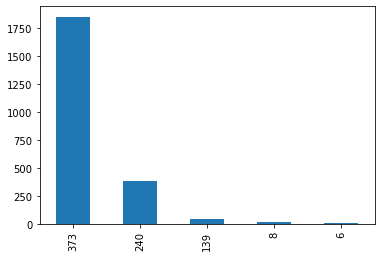

In [26]:
pd.value_counts(days_of_data_collection).plot.bar()
plt.show()

Which detectors have recoded days less than 138?

In [27]:
# Print the name of keys where number of recoded days are less than 138
less_data_detectors = []

for i in range(len(newest_date)):
    days = (datetime.strptime(newest_date[i],'%Y-%m-%d') - datetime.strptime(oldest_date[i],'%Y-%m-%d')).days
    if(days < 139):
        less_data_detectors.append(newest_date.keys()[i])
        
less_data_detectors

['CNTR_N01/046a1',
 'CNTR_N01/061b1',
 'CNTR_N10/255x1',
 'EAST_N05/022a1',
 'EAST_N05/022b1',
 'EAST_N05/022c1',
 'EAST_N05/022d3',
 'EAST_N05/089a1',
 'EAST_N17/064z1',
 'NORT_N00/050b1',
 'SOUT_N07/021h1',
 'SOUT_N08/092f1',
 'SOUT_N08/093y2',
 'SOUT_N08/093z1',
 'SOUT_N08/094x1',
 'SOUT_N08/094z2',
 'SOUT_N08/103b1',
 'SOUT_N08/163b1',
 'SOUT_N08/337x1',
 'SOUT_N09/262a1']

6 and 8 days are very less to get an idea about the traffic on the road so let's delete data from these 20 detectors. 

In [28]:
distinct_street_ldectectors = distinct_street_ldectectors[~distinct_street_ldectectors.detid.isin(less_data_detectors)]
london_traffic_filtered = london_traffic_filtered[~london_traffic_filtered.detid.isin(less_data_detectors)]

# Reset the index after removing the detectors
distinct_street_ldectectors = distinct_street_ldectectors.reset_index(drop=True)
london_traffic_filtered = london_traffic_filtered.reset_index(drop=True)

In [29]:
london_traffic_filtered.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


Let's see what is the average number of vehicles that pass through each detector per hour and plot it on the map. But working with this amount of data can still be challenging. So let's just randomly select 10 detectors out of all.

In [44]:
subset_ldetectors = distinct_street_ldectectors.sample(n=10)
subset_ldetectors = subset_ldetectors.reset_index(drop=True)

Where are these random detectors located?

In [46]:
subset_detector_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11)

for i in range(len(subset_ldetectors)):
    folium.Marker([subset_ldetectors['lat'][i], subset_ldetectors['long'][i]], popup= subset_ldetectors['detid'][i]).add_to(subset_detector_map)
subset_detector_map

Nice! Let's filter out all the traffic data for these detectors. 

In [47]:
london_traffic_subset = london_traffic_filtered[london_traffic_filtered.detid.isin(subset_ldetectors['detid'])]

In [55]:
london_traffic_subset = london_traffic_subset.reset_index(drop=True)
london_traffic_subset.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,CNTR_N02/032b1,324.0,0.075000,0.0,london,NaN
1,2015-05-16,300,CNTR_N02/032b1,180.0,0.060000,0.0,london,NaN
2,2015-05-16,600,CNTR_N02/032b1,264.0,0.060833,0.0,london,NaN
3,2015-05-16,900,CNTR_N02/032b1,204.0,0.055833,0.0,london,NaN
4,2015-05-16,1200,CNTR_N02/032b1,228.0,0.048333,0.0,london,NaN


In [53]:
#How much the size has been reduced?
print(len(london_traffic_filtered))
print(len(london_traffic_subset))

13550526
61791


That is a substantial reduction in size. Now let's create traffic data based on the hours. 

In [60]:
# Creating an empty dataframe
data = []
detector_traffic_by_hour = pd.DataFrame(data, columns=['day', 'interval', 'detid', 'flow'])

for i in tqdm(range(len(subset_ldetectors))):
    uniqueDates = london_traffic_subset[london_traffic_subset.detid == subset_ldetectors.loc[i].detid]['day'].unique()
    for j in range(len(uniqueDates)): # looping through dates recorded for that detector
        for k in range(0, 86400, 3600): # Looping through seconds per hour for whole day
            total_flow = london_traffic_subset[(london_traffic_subset.day == uniqueDates[j]) & (london_traffic_subset.interval.between(k, k+3599)) & (london_traffic_subset.detid == (subset_ldetectors.loc[i].detid))]['flow'].sum()
            detector_traffic_by_hour = detector_traffic_by_hour.append({
                'day': uniqueDates[j],
                'interval': k,
                'detid': subset_ldetectors.loc[i].detid,
                'flow': total_flow
            }, ignore_index=True)

# for i in tqdm(range(len(distinct_street_ldectectors))):
#     uniqueDates = london_traffic_filtered[london_traffic_filtered.detid == distinct_street_ldectectors.loc[i].detid]['day'].unique()
#     for j in range(len(uniqueDates)): # looping through dates recorded for that detector
#             total_flow = london_traffic_filtered[(london_traffic_filtered.day == uniqueDates[j]) & (london_traffic_filtered.detid == (distinct_street_ldectectors.loc[i].detid))]['flow'].sum()
#             london_traffic_by_hour = london_traffic_by_hour.append({
#                 'day': uniqueDates[j],
#                 'detid': distinct_street_ldectectors.loc[i].detid,
#                 'flow': total_flow
#             }, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.29s/it]


In [64]:
detector_traffic_by_hour.head()

,day,interval,detid,flow
0,2015-05-16,0,CNTR_N02/253r1,5951.7837
1,2015-05-16,3600,CNTR_N02/253r1,4525.8305
2,2015-05-16,7200,CNTR_N02/253r1,3624.0000
3,2015-05-16,10800,CNTR_N02/253r1,3780.0000
4,2015-05-16,14400,CNTR_N02/253r1,2652.0000


This is looking promissing. Let's try to plot the hourly average by detectors. 